In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Chipotle.csv to Chipotle.csv


In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Chipotle.csv')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [4]:
#getting column names
columns=list(df.columns)
columns

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [5]:
#missing values
print("Missing values distribution: ")
print(df.isnull().sum())
print("")

Missing values distribution: 
order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64



In [6]:
#no of column and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
#checking duplicates
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4617    False
4618    False
4619    False
4620    False
4621    False
Length: 4622, dtype: bool


In [8]:
#Removing $ from the data frame

df

df.iloc[:, 4].replace("\$", "", inplace=True, regex=True)

df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [9]:
#Changing type of values

item_price = pd.to_numeric(df['item_price'])

quantity = pd.to_numeric(df['quantity'])

df['order_value'] = quantity* item_price

df[:10]

,order_id,quantity,item_name,choice_description,item_price,order_value
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
6,3,1,Side of Chips,NaN,1.69,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,9.25


In [10]:
grouped = df.groupby(['order_id']).sum()
print(grouped)

          quantity  order_value
order_id                       
1                4        11.56
2                2        33.96
3                2        12.67
4                2        21.00
5                2        13.70
...            ...          ...
1830             2        23.00
1831             3        12.90
1832             2        13.20
1833             2        23.50
1834             3        28.75

[1834 rows x 2 columns]


<ipython-input-10-df341346f226>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['order_id']).sum()


In [11]:
grouped.mean() 

quantity        2.711014
order_value    21.394231
dtype: float64

In [12]:
grouped.median()


quantity        2.00
order_value    16.65
dtype: float64

Text(0.5, 1.0, 'General Distribution of the Order Value')

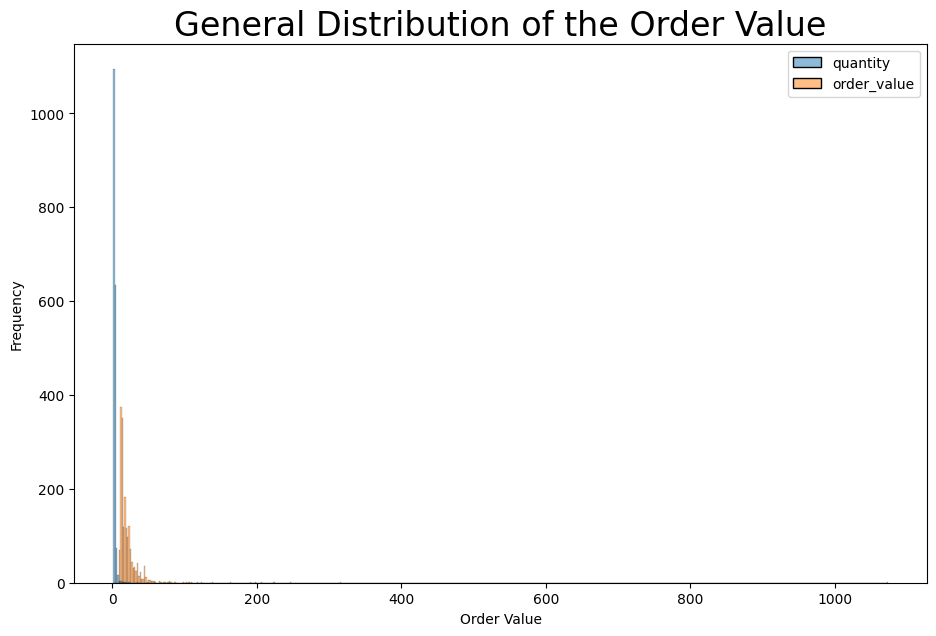

In [13]:
plt.figure(figsize=(11,7))
sns.histplot(grouped)
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.title("General Distribution of the Order Value", size=24)

In [14]:
sorted = df.sort_values('order_value', ascending=False)
print(sorted)

      order_id  quantity                     item_name  \
3598      1443        15  Chips and Fresh Tomato Salsa   
4152      1660        10                 Bottled Water   
1254       511         4               Chicken Burrito   
3602      1443         4               Chicken Burrito   
3887      1559         8                 Side of Chips   
...        ...       ...                           ...   
107         47         1                   Canned Soda   
195         87         1                   Canned Soda   
434        188         1                   Canned Soda   
2814      1117         1                   Canned Soda   
4069      1629         1                 Bottled Water   

                                     choice_description item_price  \
3598                                                NaN     44.25    
4152                                                NaN     15.00    
1254  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...     35.00    
3602  [Fresh Tomato Sal

In [15]:
data = df.drop([df.index[3598]])
data = data.groupby(['order_id']).sum()

<ipython-input-15-9de6cf88f5f4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby(['order_id']).sum()


Text(0.5, 1.0, 'General Distribution of the Order Value')

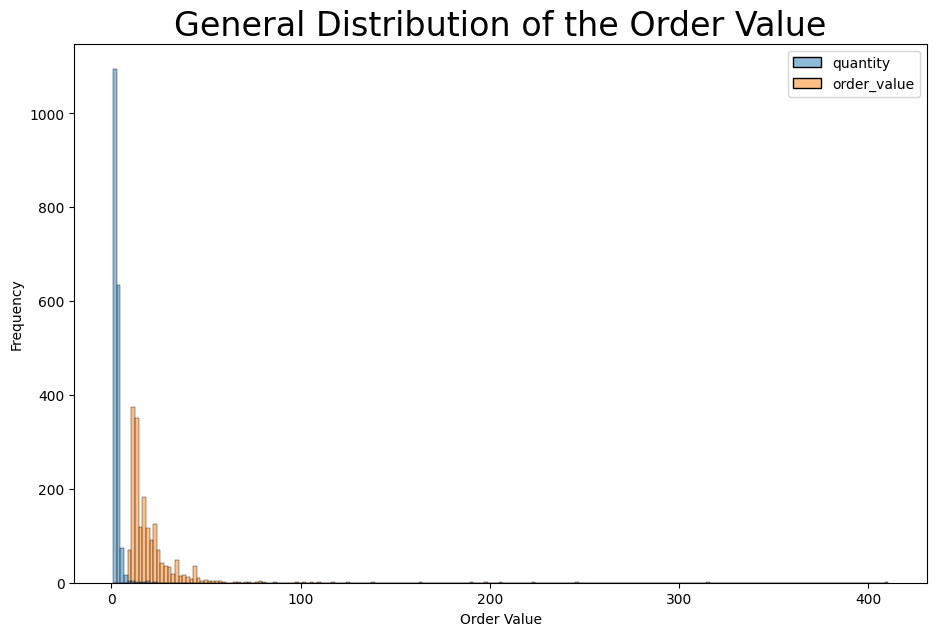

In [16]:
plt.figure(figsize=(11,7))
sns.histplot(data)
plt.xlabel("Order Value")
plt.ylabel("Frequency")
plt.title("General Distribution of the Order Value", size=24)

In [17]:
#Convert "item_price" column to numeric data type
df["item_price"] = pd.to_numeric(df["item_price"])

print(
    "There are {} observations and {} features in this dataset. They are {}. \n".format(
        df.shape[0], df.shape[1], ", ".join(list(df.columns))
    )
)

print(
    "There are {} different items in this dataset such as {}... \n".format(
        len(df.item_name.unique()), ", ".join(df.item_name.unique()[0:5])
    )
)

print(
    "There are {} unique orders in this dataset. \n".format(
        len(df["order_id"].unique())
    )
)

print(
    "The total revenue generated from the orders within is about ${} USD. \n".format(
        round(df["item_price"].sum(), 2)
    )
)

There are 4622 observations and 6 features in this dataset. They are order_id, quantity, item_name, choice_description, item_price, order_value. 

There are 50 different items in this dataset such as Chips and Fresh Tomato Salsa, Izze, Nantucket Nectar, Chips and Tomatillo-Green Chili Salsa, Chicken Bowl... 

There are 1834 unique orders in this dataset. 

The total revenue generated from the orders within is about $34500.16 USD. 



In [18]:
by_order = pd.DataFrame(data.groupby(by="order_id").agg("sum").reset_index())
by_order = by_order.rename(columns={"item_price": "order_amount"})

# avg. order price
print(
    "The avg. order price is $",
    round(sum(by_order["order_value"]) / len(by_order["order_id"]), 2),
)

The avg. order price is $ 21.03


      order_id  avg_order_price
0            1         2.890000
1            2        16.980000
2            3         6.335000
3            4        10.500000
4            5         6.850000
...        ...              ...
1829      1830        11.500000
1830      1831         4.300000
1831      1832         6.600000
1832      1833        11.750000
1833      1834         9.583333

[1834 rows x 2 columns]


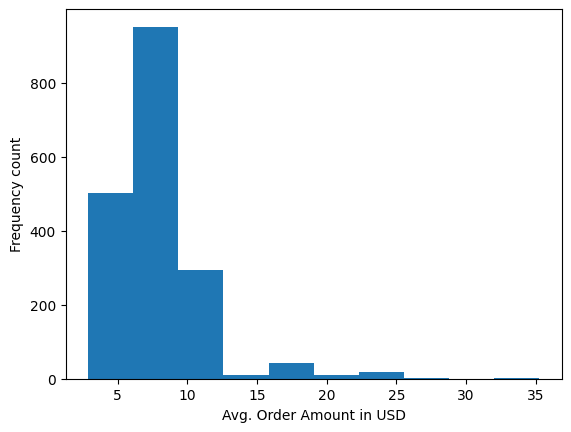

In [19]:
# Group by order_id and calculate mean of item_price
by_order = df.groupby('order_id')['item_price'].mean().reset_index()

# Rename columns
by_order = by_order.rename(columns={'item_price': 'avg_order_price'})

# Display the result
print(by_order)

# Distribution of avg. order amount across all orders
plt.hist(by_order["avg_order_price"])
plt.xlabel("Avg. Order Amount in USD")
plt.ylabel("Frequency count")
plt.show()




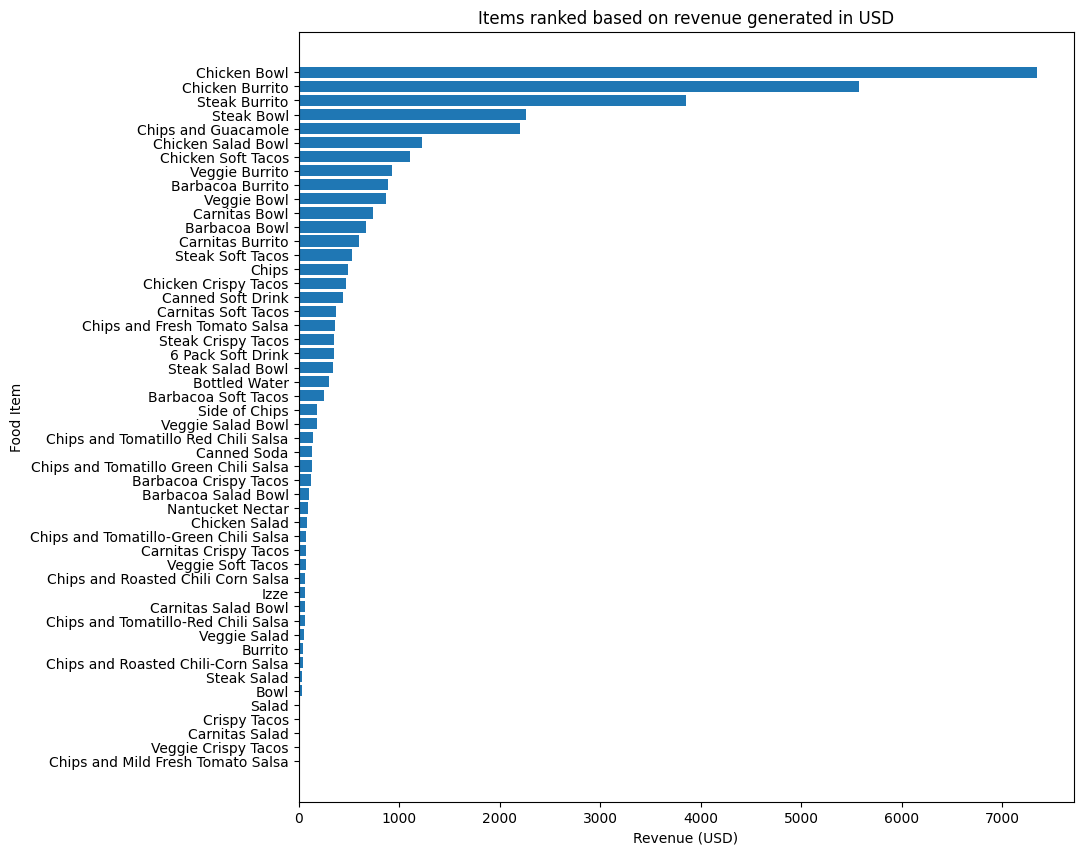

In [20]:
# average price per item ordered
by_item = pd.DataFrame(
    df.groupby(by="item_name")
    .agg({"item_price": "mean", "order_id": "count"})
    .reset_index()
)
by_item = by_item.rename(
    columns={"item_price": "avg_price_paid", "order_id": "times_ordered"}
)

by_item["revenue"] = by_item["avg_price_paid"] * by_item["times_ordered"]

plt.figure(figsize=(10, 10))
by_item = by_item.sort_values(by="revenue", ascending=True)
plt.barh(by_item["item_name"], by_item["revenue"])
plt.xlabel("Revenue (USD)")
plt.ylabel("Food Item")
plt.title("Items ranked based on revenue generated in USD")
plt.show()

In [21]:
# The top 5 items ordered mostly
by_item.sort_values(by=["times_ordered"], ascending=False)[:10]

,item_name,avg_price_paid,times_ordered,revenue
17,Chicken Bowl,10.113953,726,7342.73
18,Chicken Burrito,10.082857,553,5575.82
25,Chips and Guacamole,4.595073,479,2201.04
39,Steak Burrito,10.465842,368,3851.43
10,Canned Soft Drink,1.457641,301,438.75
38,Steak Bowl,10.711801,211,2260.19
23,Chips,2.342844,211,494.34
6,Bottled Water,1.867654,162,302.56
22,Chicken Soft Tacos,9.635565,115,1108.09
21,Chicken Salad Bowl,11.170455,110,1228.75


In [22]:
# Ordering by Revenue 
by_item.sort_values(by=["revenue"], ascending=False)[:10]

,item_name,avg_price_paid,times_ordered,revenue
17,Chicken Bowl,10.113953,726,7342.73
18,Chicken Burrito,10.082857,553,5575.82
39,Steak Burrito,10.465842,368,3851.43
38,Steak Bowl,10.711801,211,2260.19
25,Chips and Guacamole,4.595073,479,2201.04
21,Chicken Salad Bowl,11.170455,110,1228.75
22,Chicken Soft Tacos,9.635565,115,1108.09
45,Veggie Burrito,9.839684,95,934.77
2,Barbacoa Burrito,9.832418,91,894.75
44,Veggie Bowl,10.211647,85,867.99


In [36]:
# Filter items with customization by checking for special characters in item_description
customizable_items = df[df['item_name'].str.contains('[+]', regex=True)]

# Extract unique customizable items
unique_customizable_items = customizable_items['item_name'].unique()

# Display the list of customizable items
print("List of items where customization was possible:")
for item in unique_customizable_items:
    print(item)

List of items where customization was possible:


In [25]:
df_without_na = df.dropna(subset=["item_name"])
pd.Series(df_without_na["item_name"].unique())

0              Chips and Fresh Tomato Salsa
1                                      Izze
2                          Nantucket Nectar
3     Chips and Tomatillo-Green Chili Salsa
4                              Chicken Bowl
5                             Side of Chips
6                             Steak Burrito
7                          Steak Soft Tacos
8                       Chips and Guacamole
9                      Chicken Crispy Tacos
10                       Chicken Soft Tacos
11                          Chicken Burrito
12                              Canned Soda
13                         Barbacoa Burrito
14                         Carnitas Burrito
15                            Carnitas Bowl
16                            Bottled Water
17    Chips and Tomatillo Green Chili Salsa
18                            Barbacoa Bowl
19                                    Chips
20                       Chicken Salad Bowl
21                               Steak Bowl
22                      Barbacoa

In [26]:
def list_to_string(lst):
    """
    Convert list-like string representation to a string without square brackets.
    """
    if isinstance(lst, str):
        # Remove square brackets
        return lst.strip("[]")
    else:
        return lst

In [27]:
df_without_na["choice_description"] = df_without_na["choice_description"].apply(list_to_string)

In [29]:
# Convert NaN values to empty strings
df_without_na["choice_description"] = df_without_na["choice_description"].fillna("")

# Join choice_description column values into a single string
text = ", ".join(df_without_na.choice_description)

# Print total number of choice additions in the choice descriptions
print("There are {} choice additions in the choice descriptions of all the items ordered.".format(len(text)))

# Further processing with the text string
my_list = text.split(", ")
word_count_dict = Counter(my_list)

There are 216319 choice additions in the choice descriptions of all the items ordered.


In [30]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from wordcloud import WordCloud

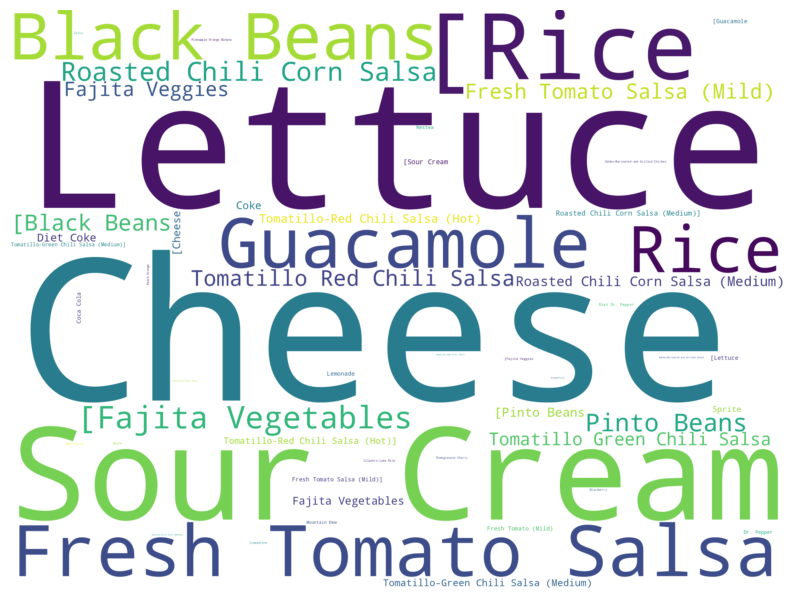

In [32]:
wordcloud = WordCloud(
    max_words = 100, background_color="white", width=1600, height=1200, scale=1.5
).generate_from_frequencies(word_count_dict)

# Display the generated image
plt.figure(figsize=(10, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()